# Decision Trees and Random Forests on Heart Disease dataset

In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/arunj/Downloads/heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

## Training and visualizing a Decision Tree Classifier.

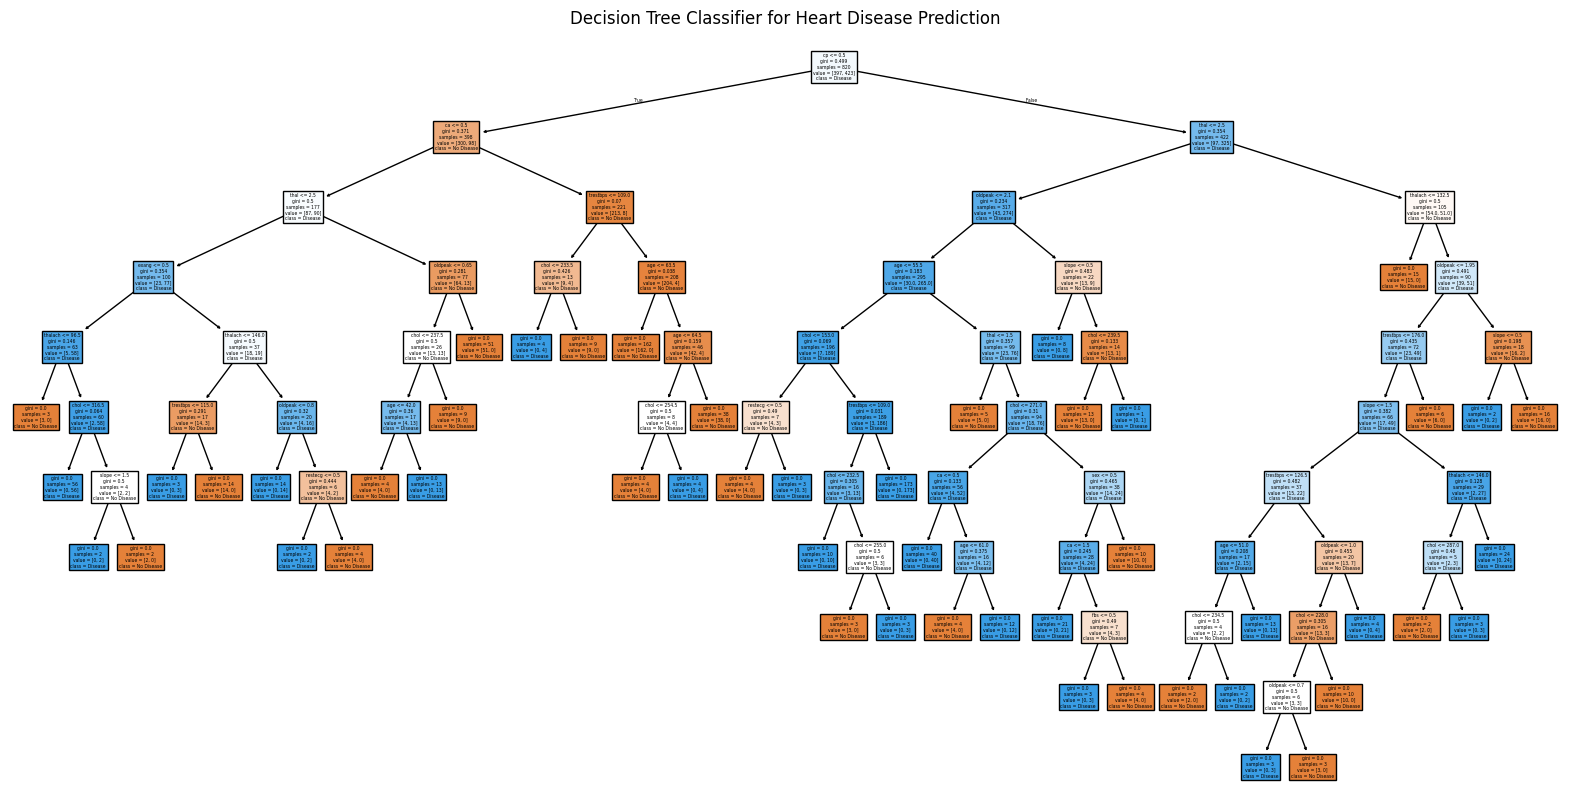

The depth of the tree is: 10
The number of leaves in the decision tree classifier: 50


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns='target')
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Classifier for Heart Disease Prediction")
plt.show()
print(f"The depth of the tree is: {clf.get_depth()}")
print(f"The number of leaves in the decision tree classifier: {clf.tree_.n_leaves}")

##### The depth 10 depicts that the model is not overfitting.
##### But number of splits seems to be more.

## Evaluating the model

Train Accuracy: 1.00
Test Accuracy: 0.99


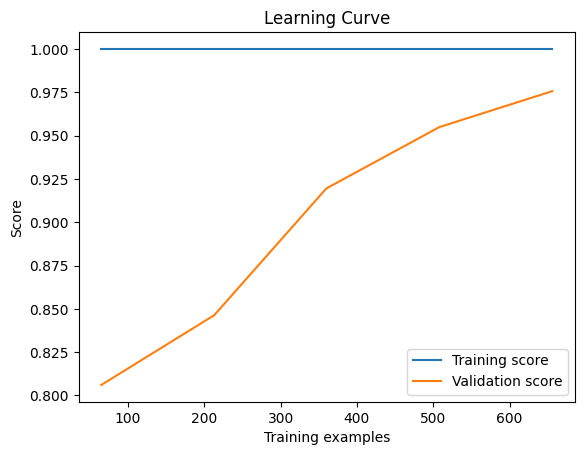

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

# Evaluate
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

### Cross Validation

In [5]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

CV Accuracy: 0.77 (+/- 0.05)


### Regularisation Parameters

In [6]:
# Training the Decision Tree Classifier using regularised parameters
clf_2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,random_state=42)
clf_2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_2, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Classifier for Heart Disease Prediction")
plt.show()
print(f"The depth of the tree is: {clf_2.get_depth()}")
print(f"The number of leaves in the decision tree classifier: {clf_2.tree_.n_leaves}")

The depth of the tree is: 5
The number of leaves in the decision tree classifier: 21


##### The tree has 
#####        - max_depth = 5 
#####        - min_samples_split = 22 
#####        - min_samples_leaf = 10 
#####        - max_leaf_nodes = 21.
##### Thus, this tree is optimal to consider.

Train Accuracy: 0.90
Test Accuracy: 0.82


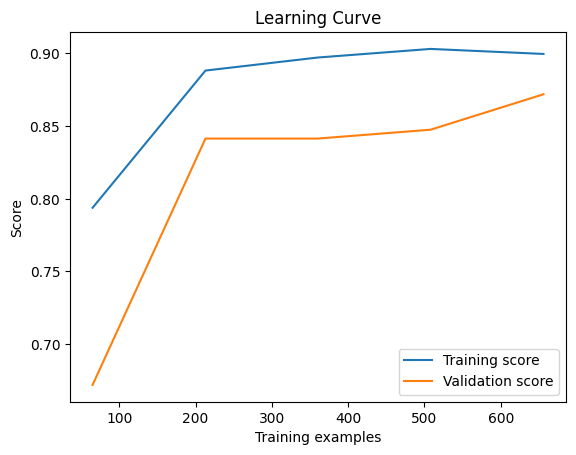

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

# Evaluate
train_acc = accuracy_score(y_train, clf_2.predict(X_train))
test_acc = accuracy_score(y_test, clf_2.predict(X_test))

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
train_sizes, train_scores, test_scores = learning_curve(clf_2, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_2, X_test, y_test, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

CV Accuracy: 0.73 (+/- 0.09)


The depth of the tree is: 10
The number of leaves in the decision tree classifier: 50
Train Accuracy: 1.00
Test Accuracy: 0.99


The depth of the tree is: 10
The number of leaves in the decision tree classifier: 50
Train Accuracy: 1.00
Test Accuracy: 0.99


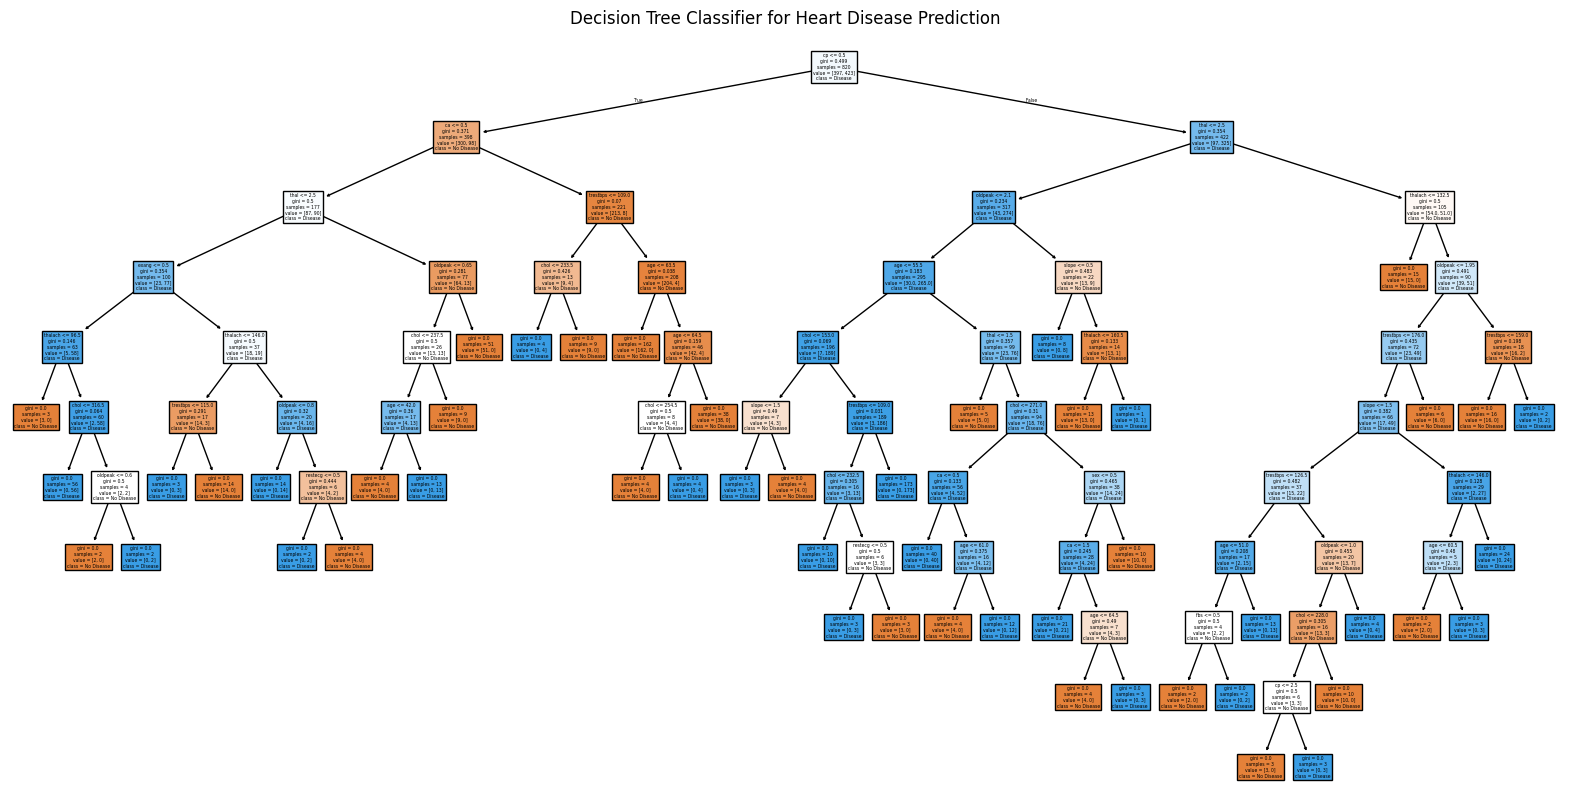

The depth of the tree is: 10
The number of leaves in the decision tree classifier: 50
Train Accuracy: 1.00
Test Accuracy: 0.99


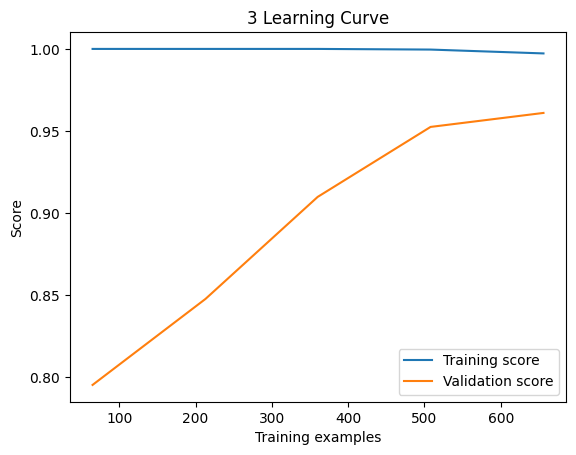

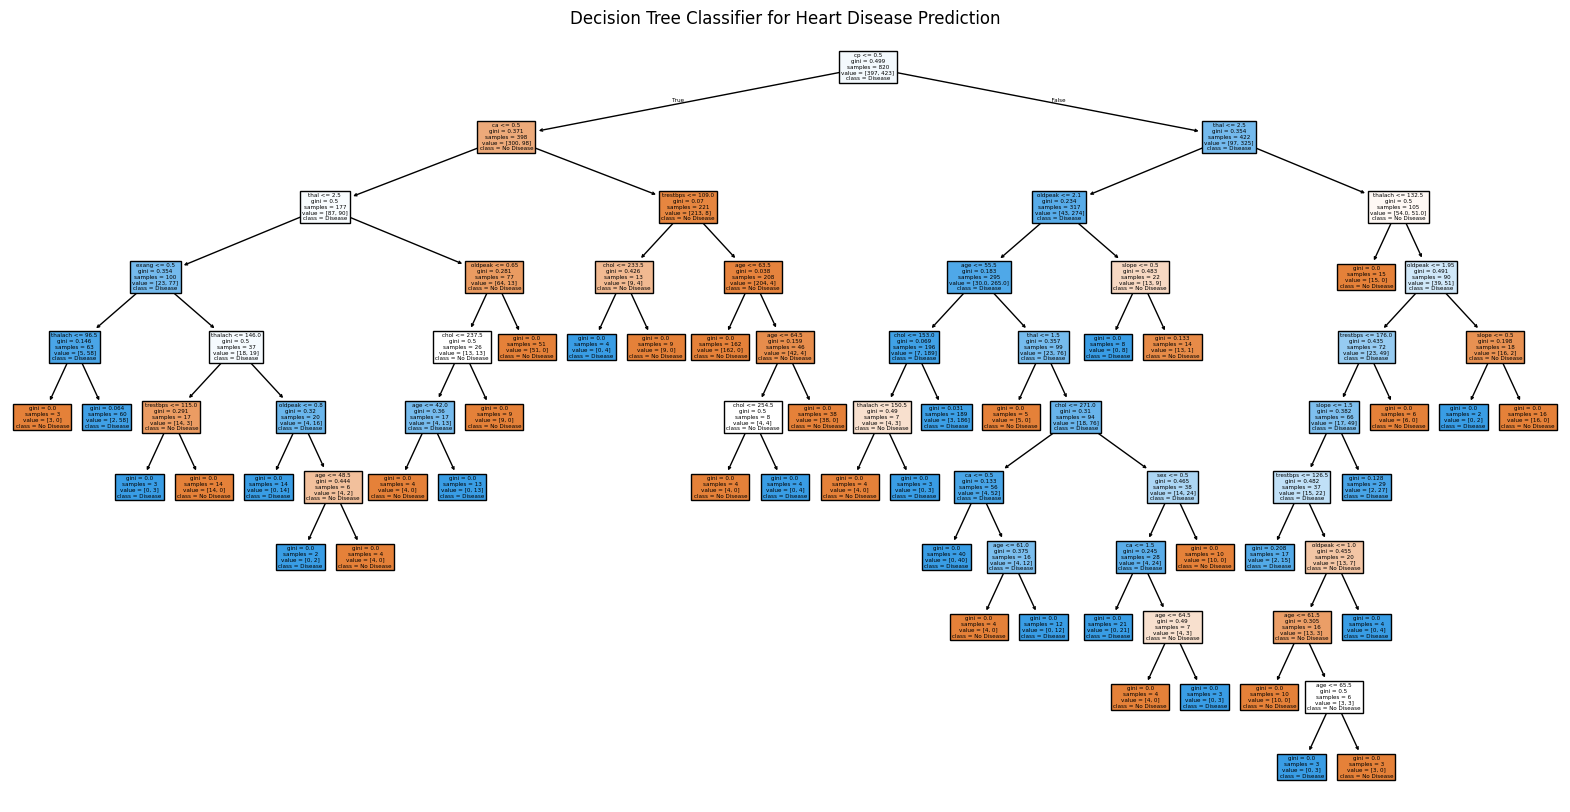

The depth of the tree is: 10
The number of leaves in the decision tree classifier: 40
Train Accuracy: 0.99
Test Accuracy: 0.94


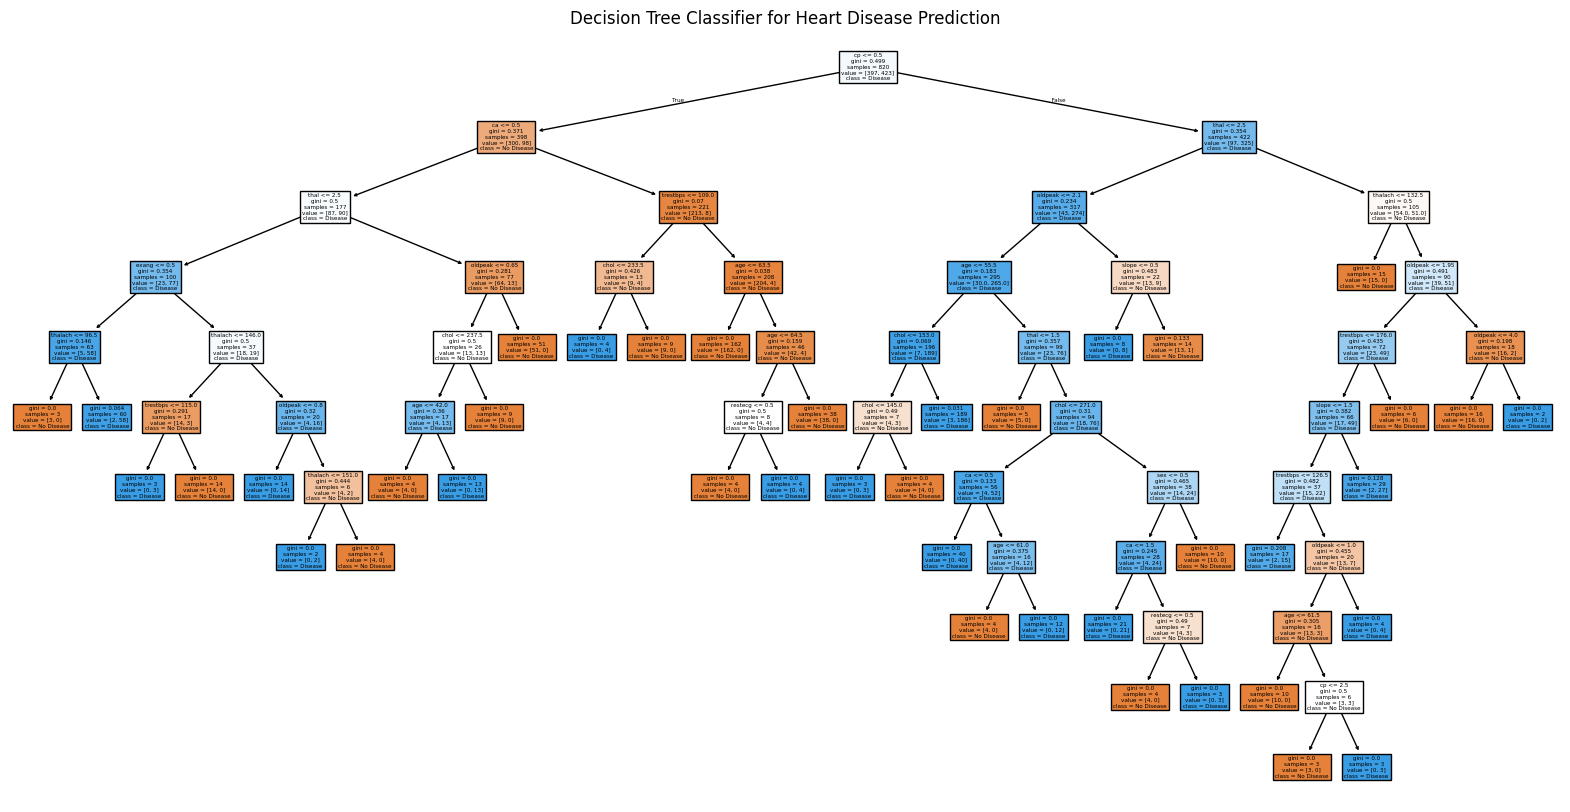

The depth of the tree is: 10
The number of leaves in the decision tree classifier: 40
Train Accuracy: 0.99
Test Accuracy: 0.94


The depth of the tree is: 9
The number of leaves in the decision tree classifier: 34
Train Accuracy: 0.98
Test Accuracy: 0.92


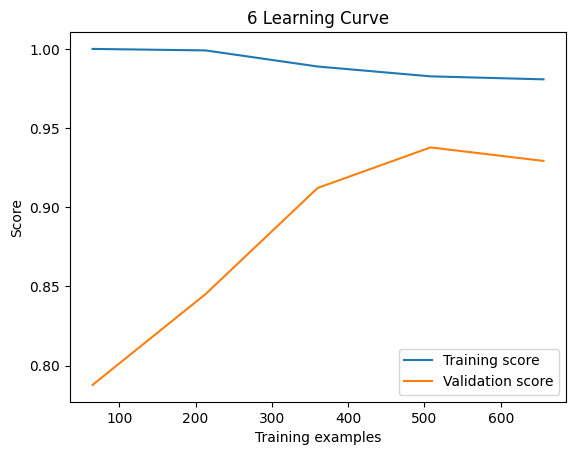

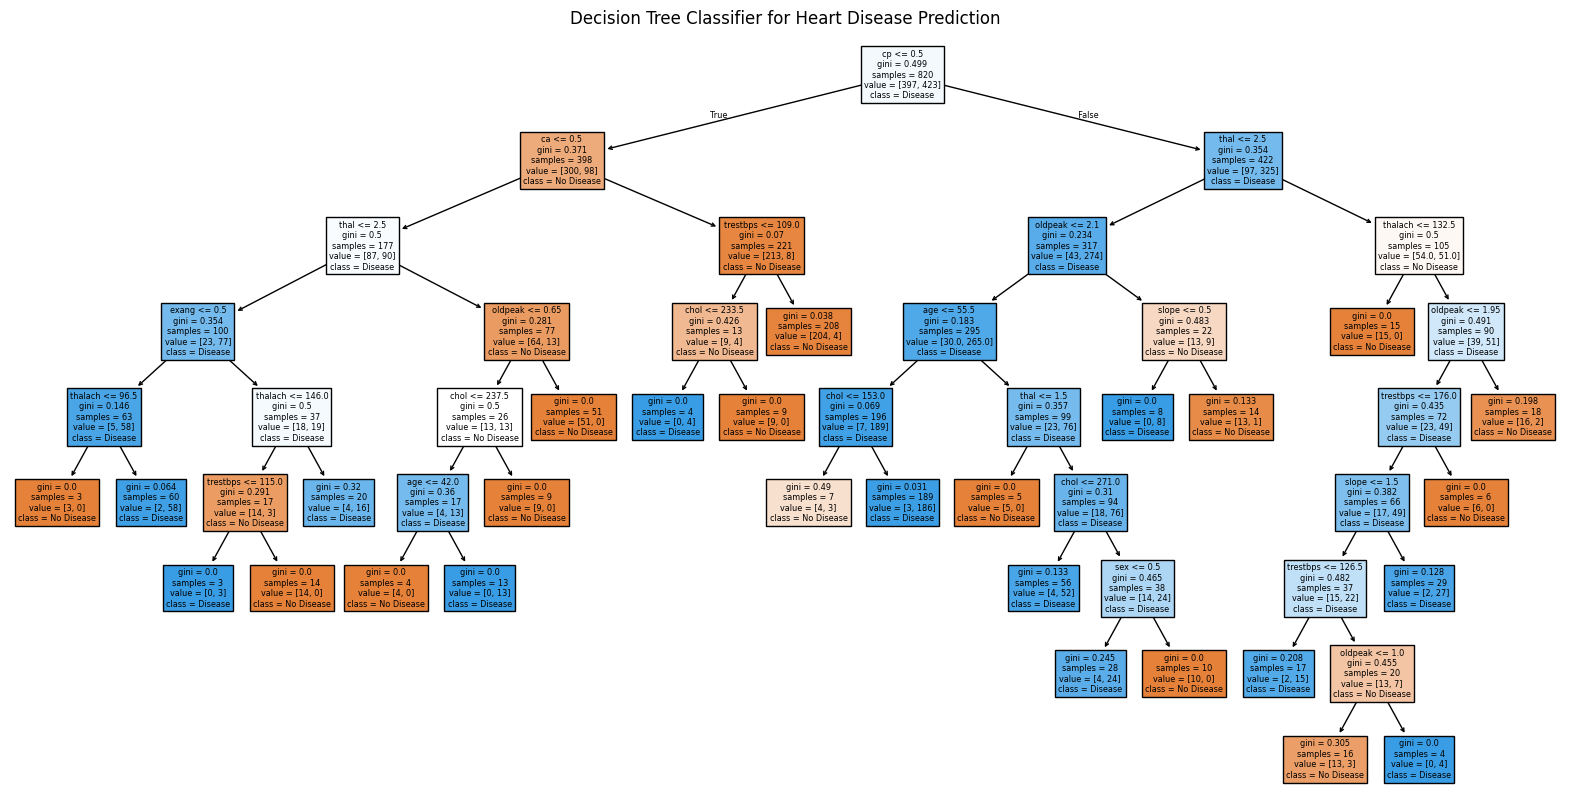

The depth of the tree is: 8
The number of leaves in the decision tree classifier: 27
Train Accuracy: 0.96
Test Accuracy: 0.87


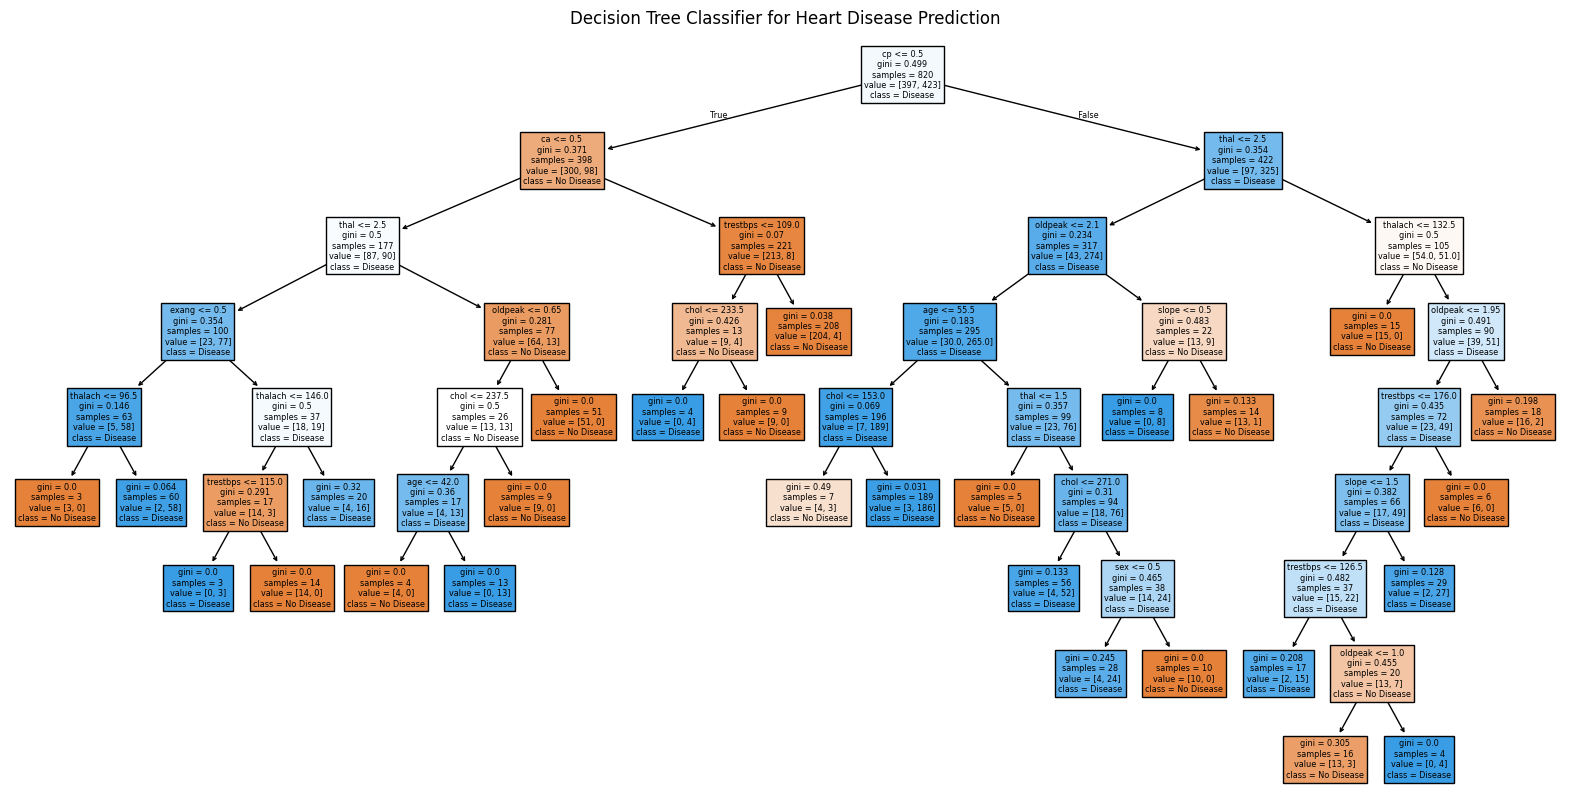

The depth of the tree is: 8
The number of leaves in the decision tree classifier: 27
Train Accuracy: 0.96
Test Accuracy: 0.87


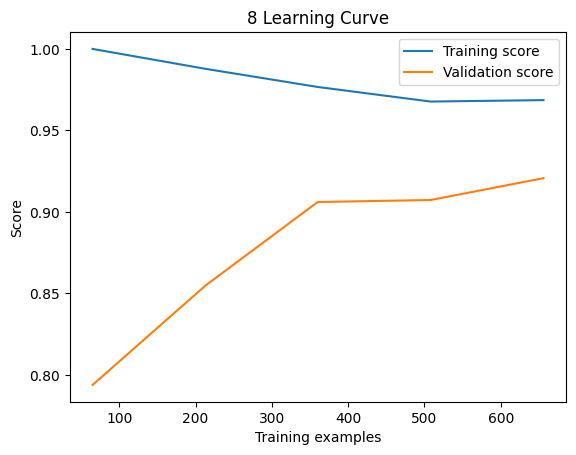

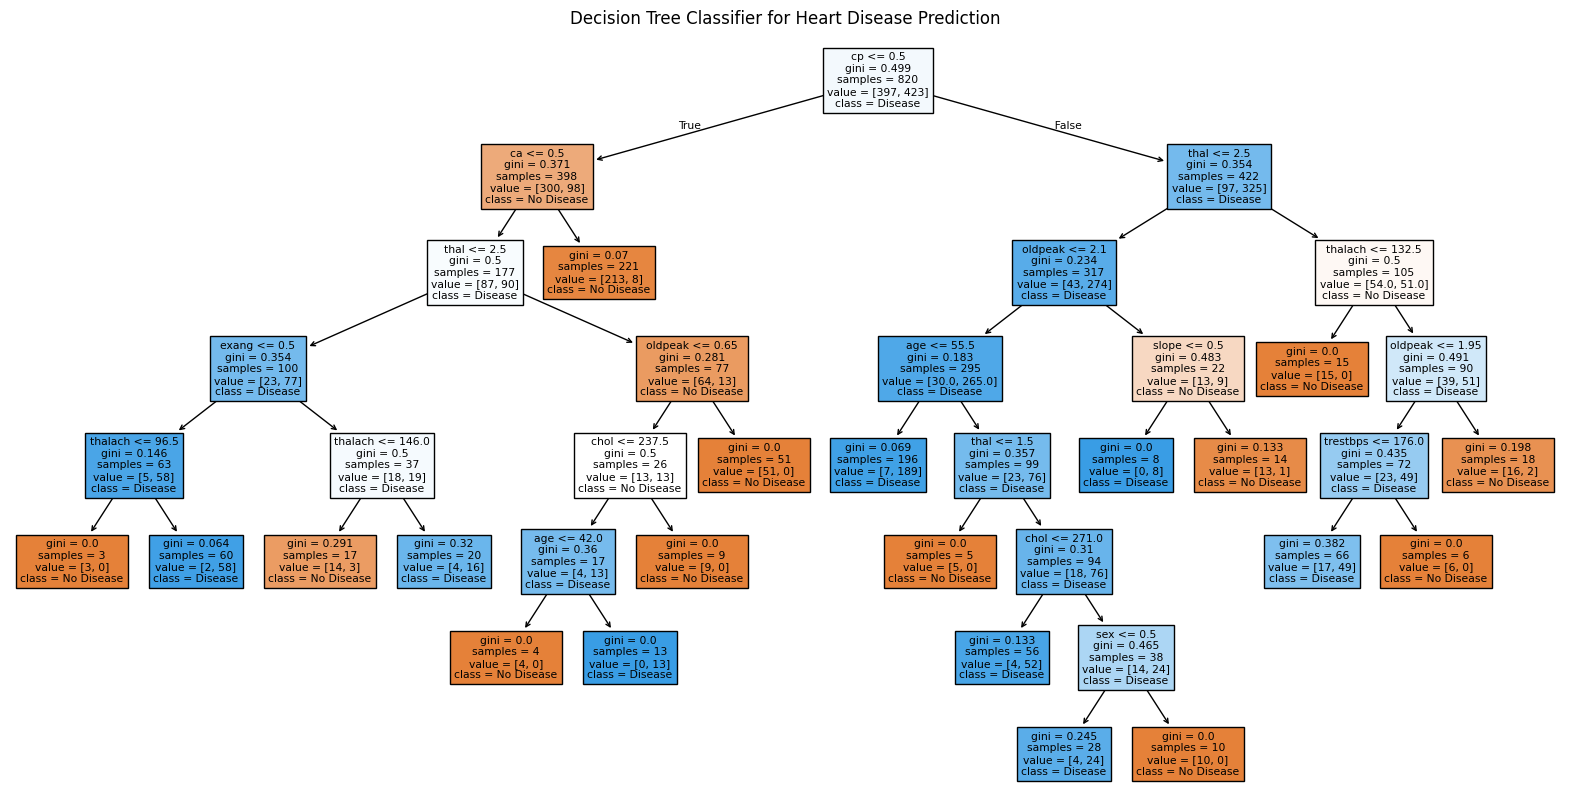

The depth of the tree is: 7
The number of leaves in the decision tree classifier: 20
Train Accuracy: 0.94
Test Accuracy: 0.86


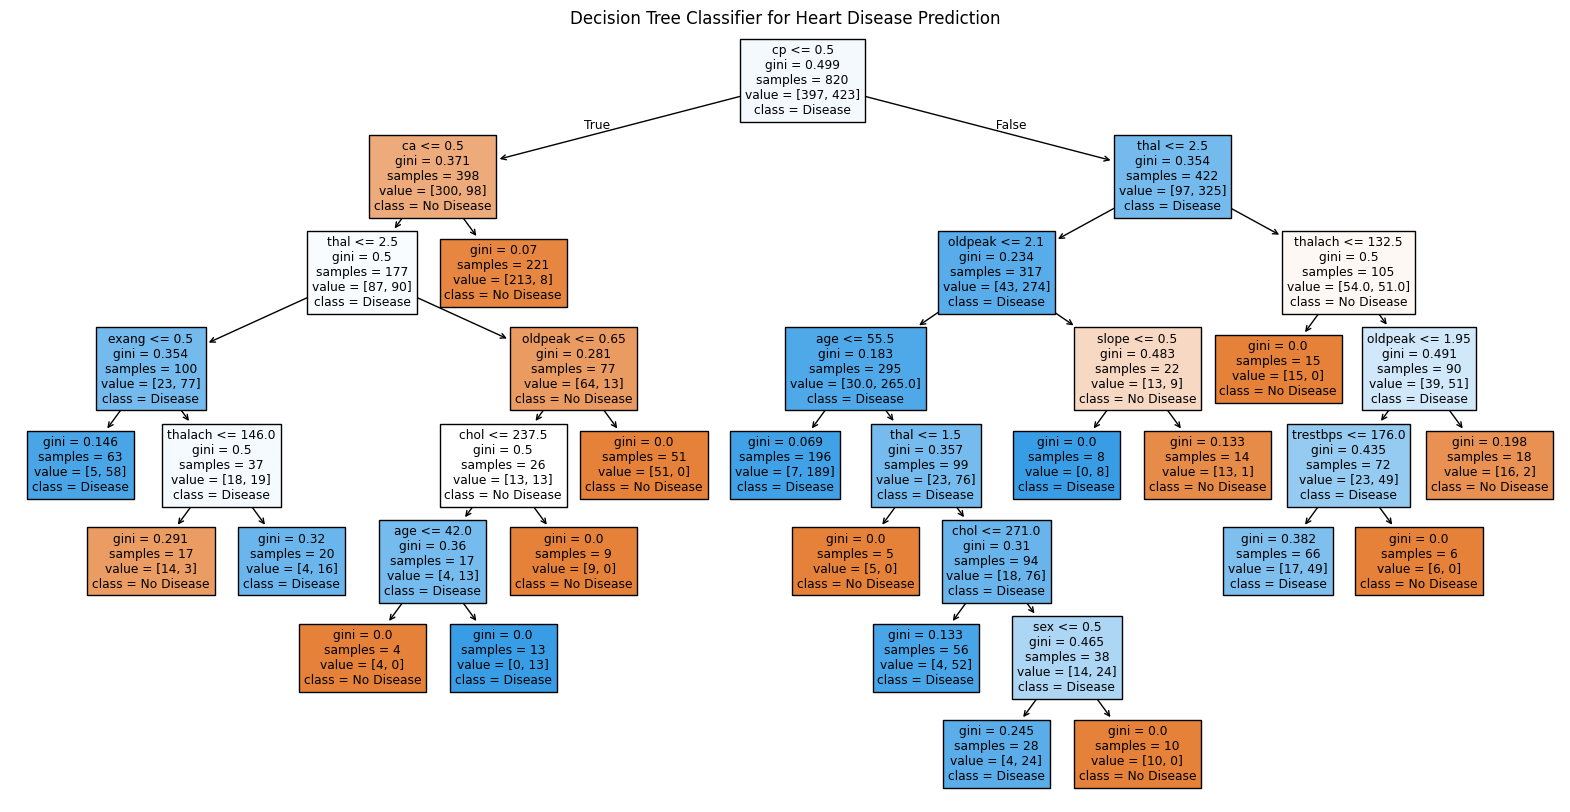

The depth of the tree is: 7
The number of leaves in the decision tree classifier: 19
Train Accuracy: 0.93
Test Accuracy: 0.85


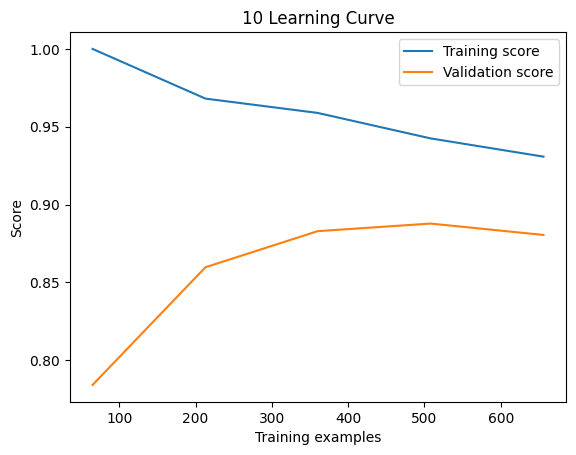

The depth of the tree is: 4
The number of leaves in the decision tree classifier: 11
Train Accuracy: 0.88
Test Accuracy: 0.79


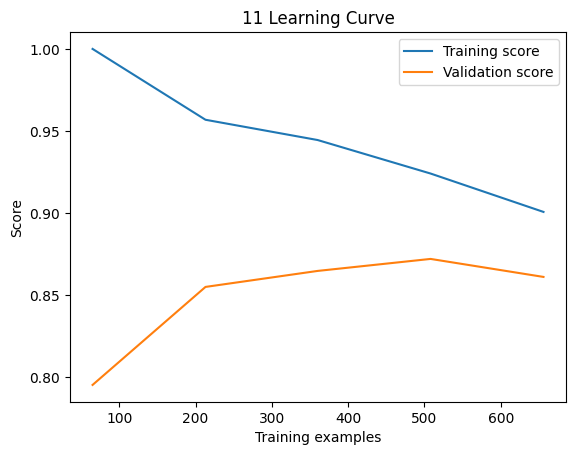

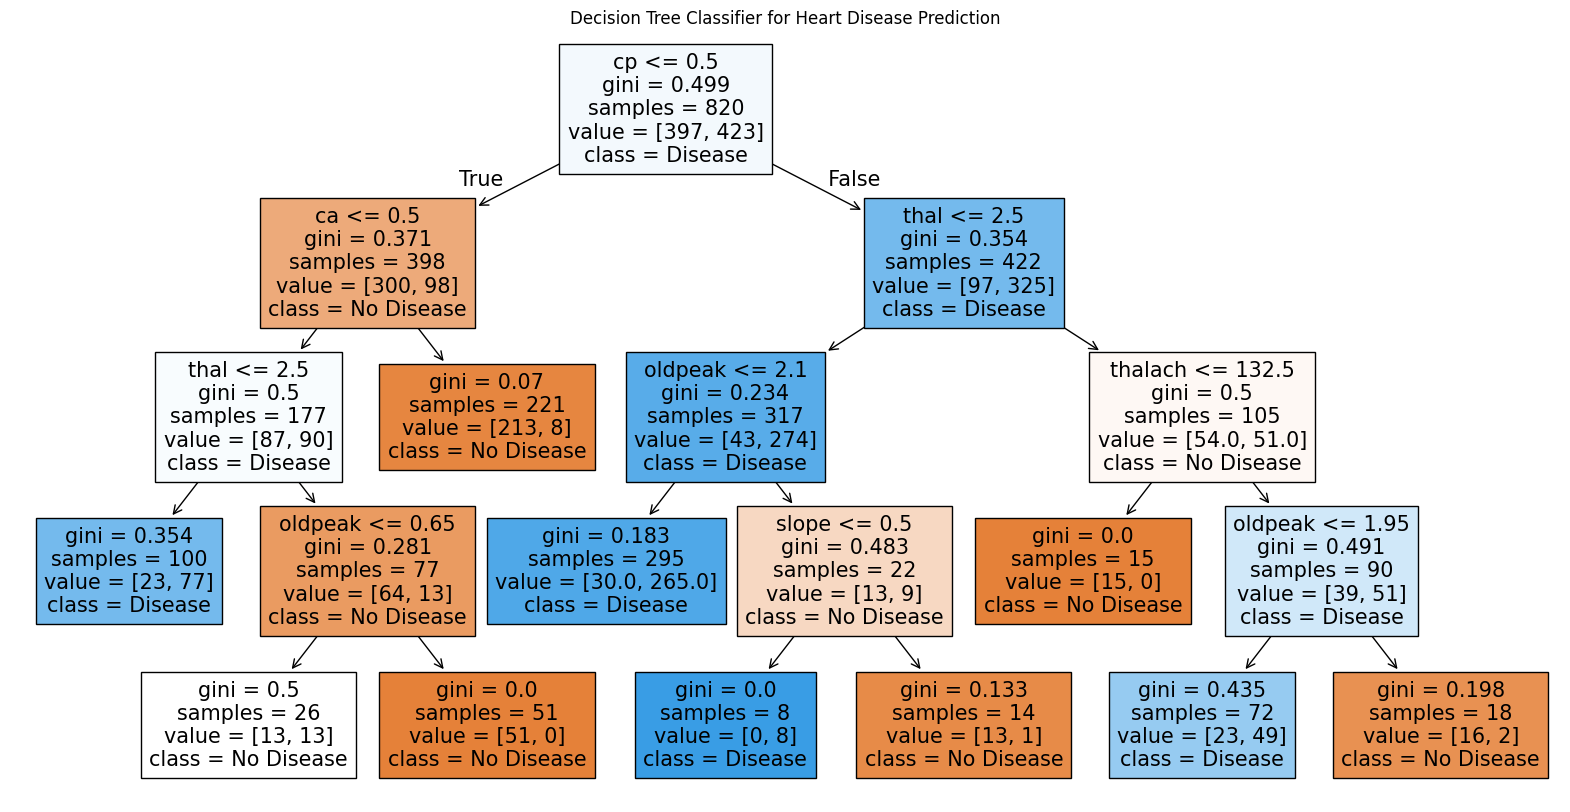

The depth of the tree is: 4
The number of leaves in the decision tree classifier: 10
Train Accuracy: 0.88
Test Accuracy: 0.79


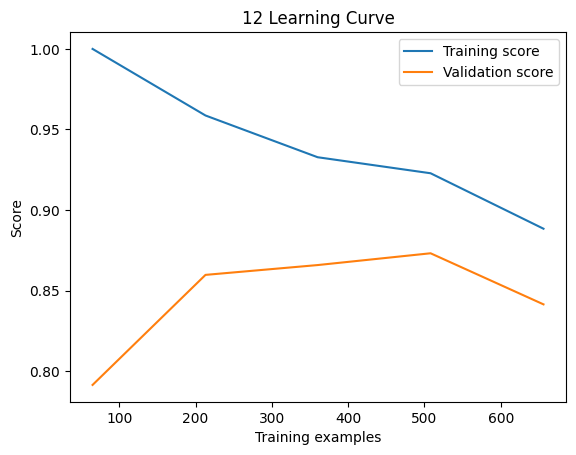

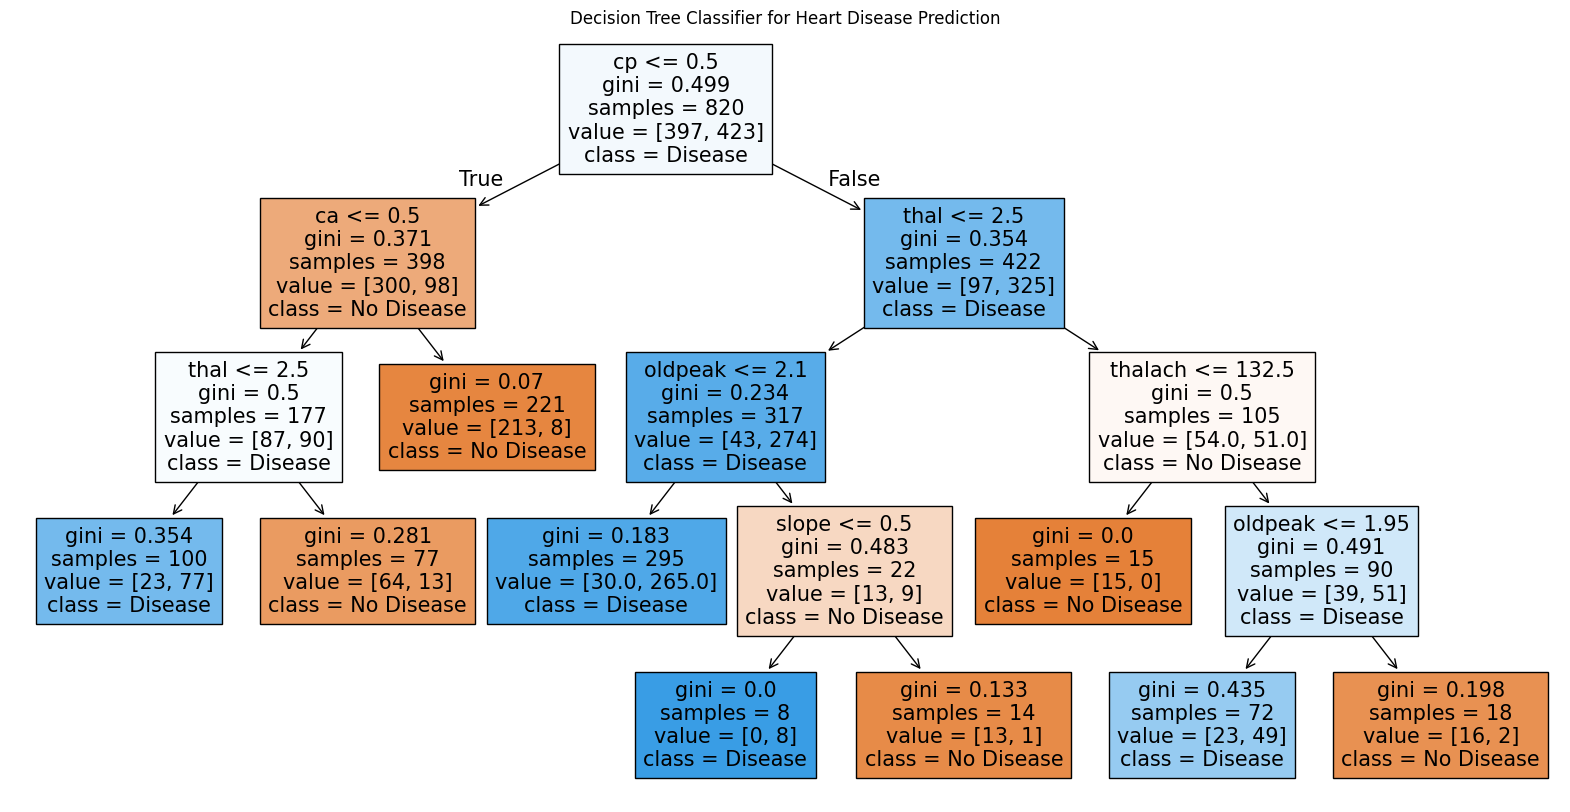

The depth of the tree is: 4
The number of leaves in the decision tree classifier: 9
Train Accuracy: 0.88
Test Accuracy: 0.79


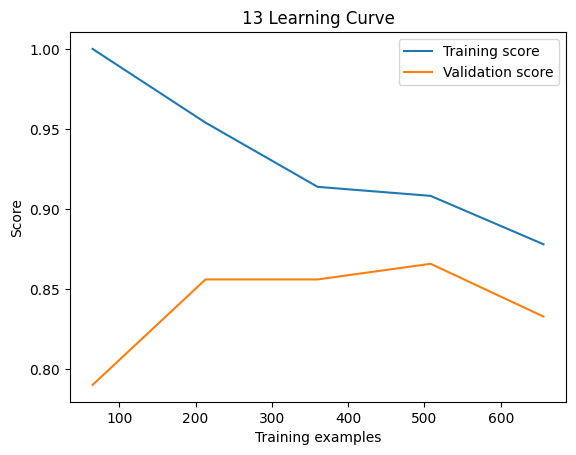

The depth of the tree is: 3
The number of leaves in the decision tree classifier: 6
Train Accuracy: 0.84
Test Accuracy: 0.73


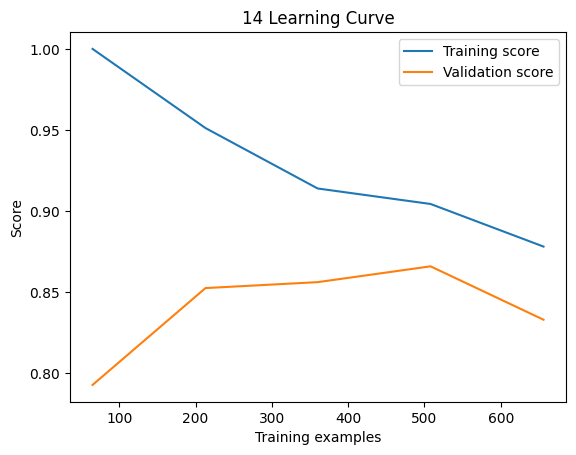

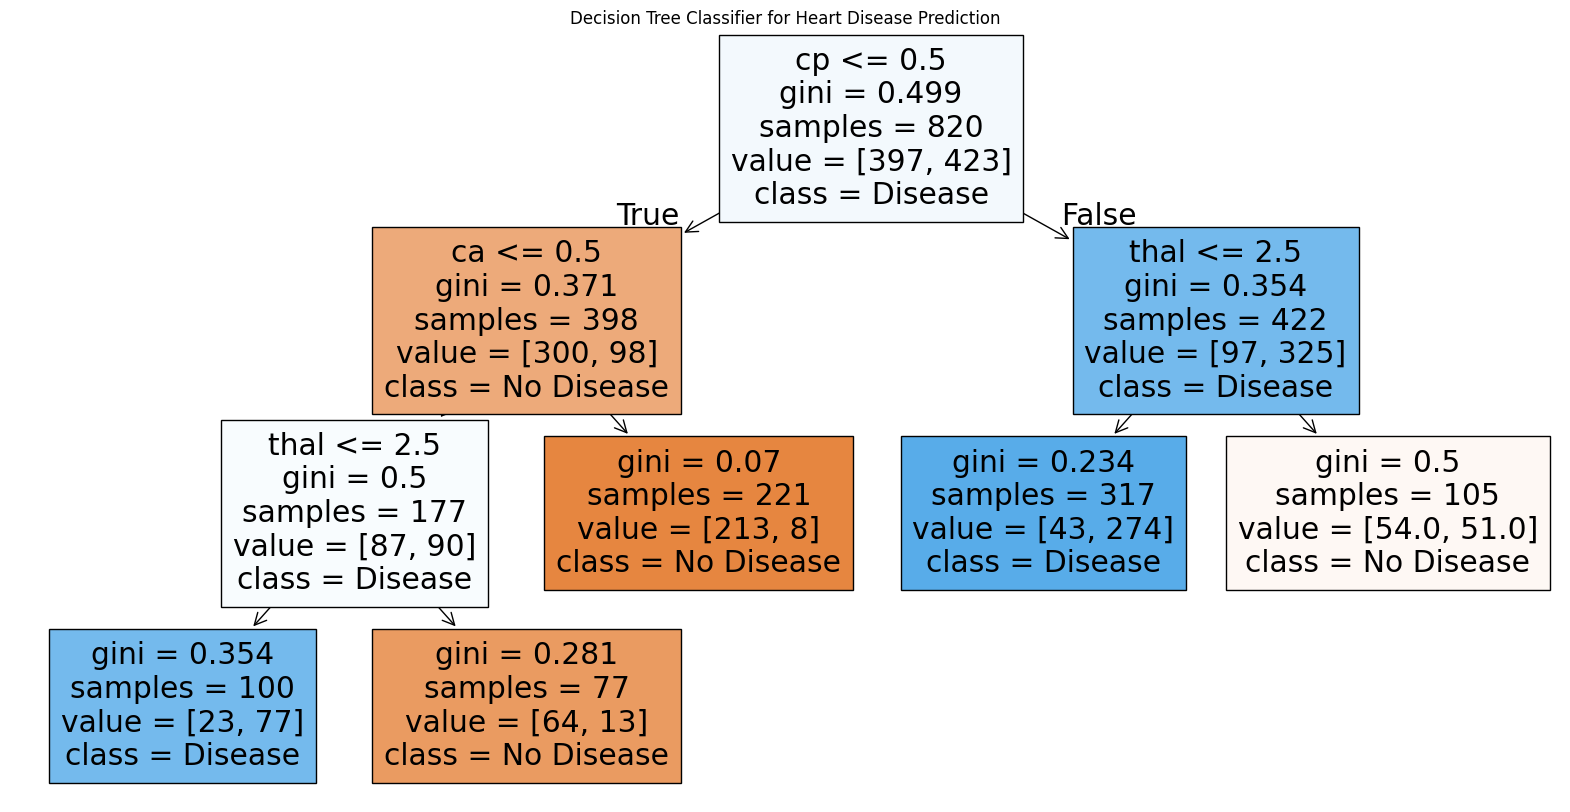

The depth of the tree is: 3
The number of leaves in the decision tree classifier: 5
Train Accuracy: 0.83
Test Accuracy: 0.74


The depth of the tree is: 3
The number of leaves in the decision tree classifier: 4
Train Accuracy: 0.83
Test Accuracy: 0.78


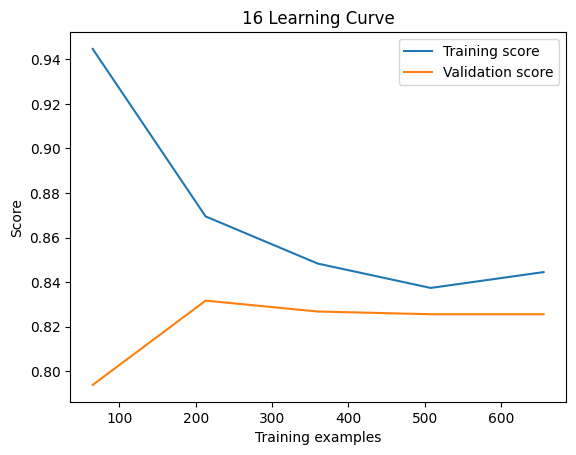

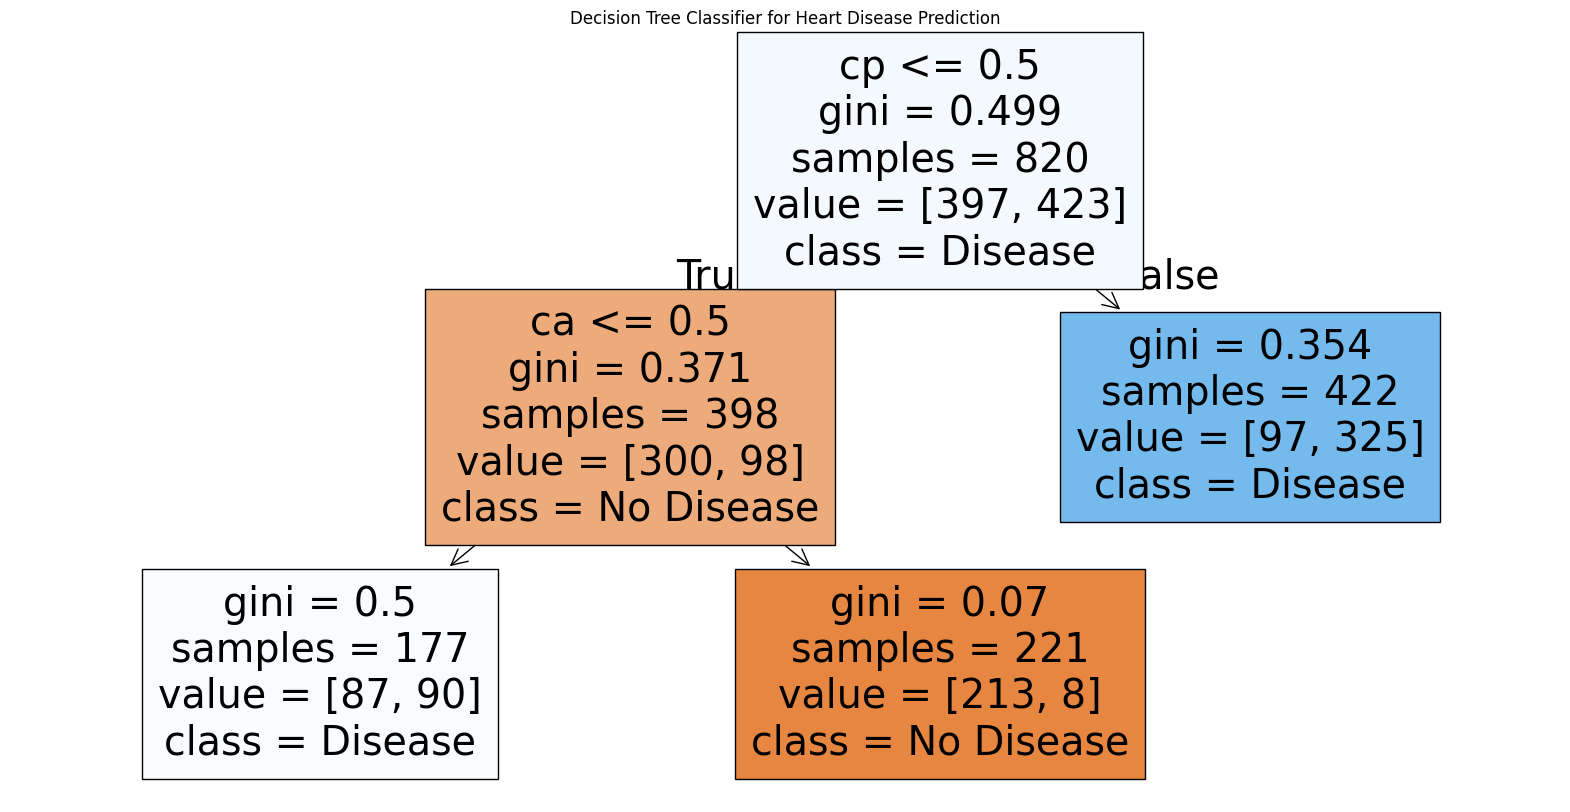

The depth of the tree is: 2
The number of leaves in the decision tree classifier: 3
Train Accuracy: 0.77
Test Accuracy: 0.71


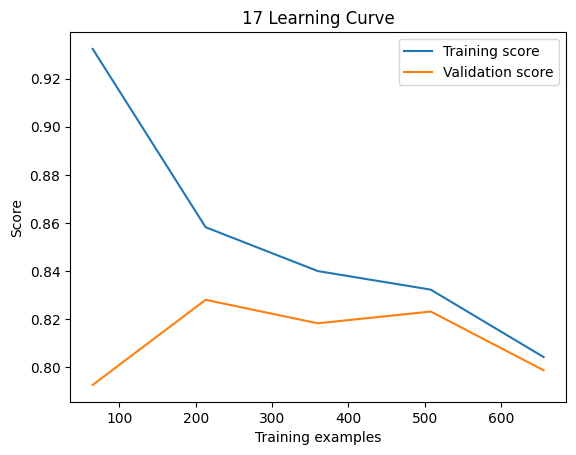

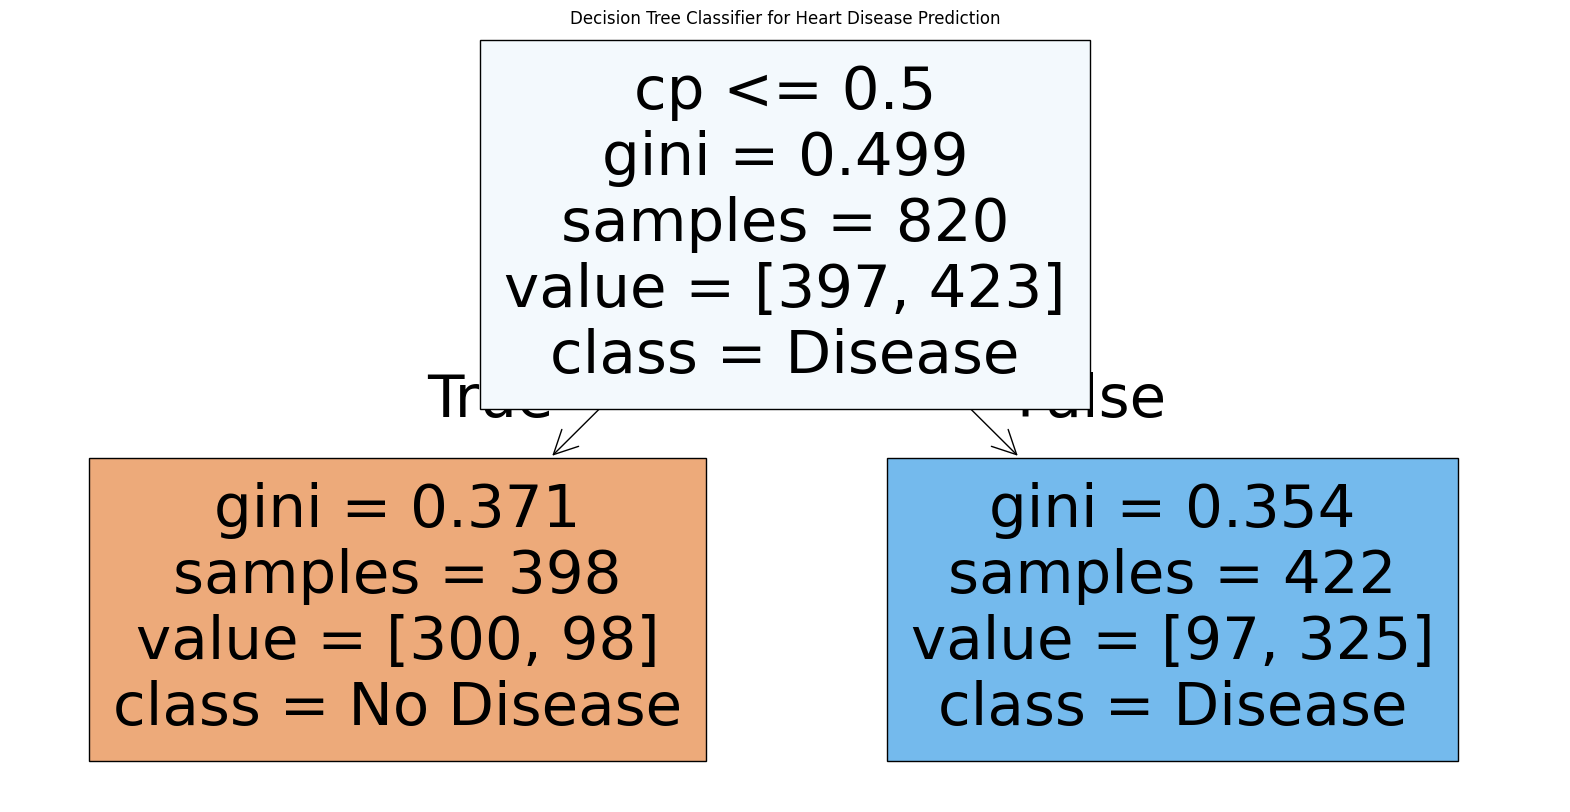

The depth of the tree is: 1
The number of leaves in the decision tree classifier: 2
Train Accuracy: 0.76
Test Accuracy: 0.75


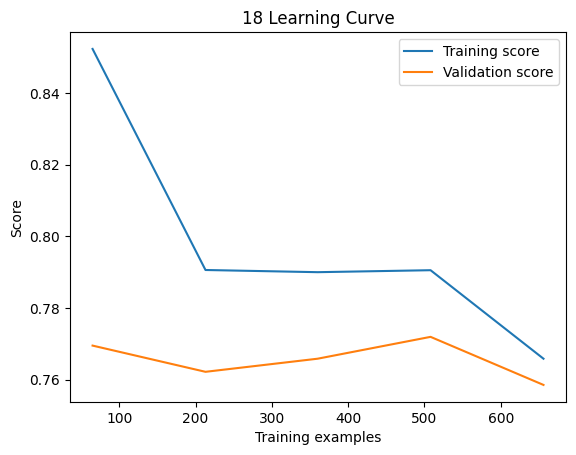

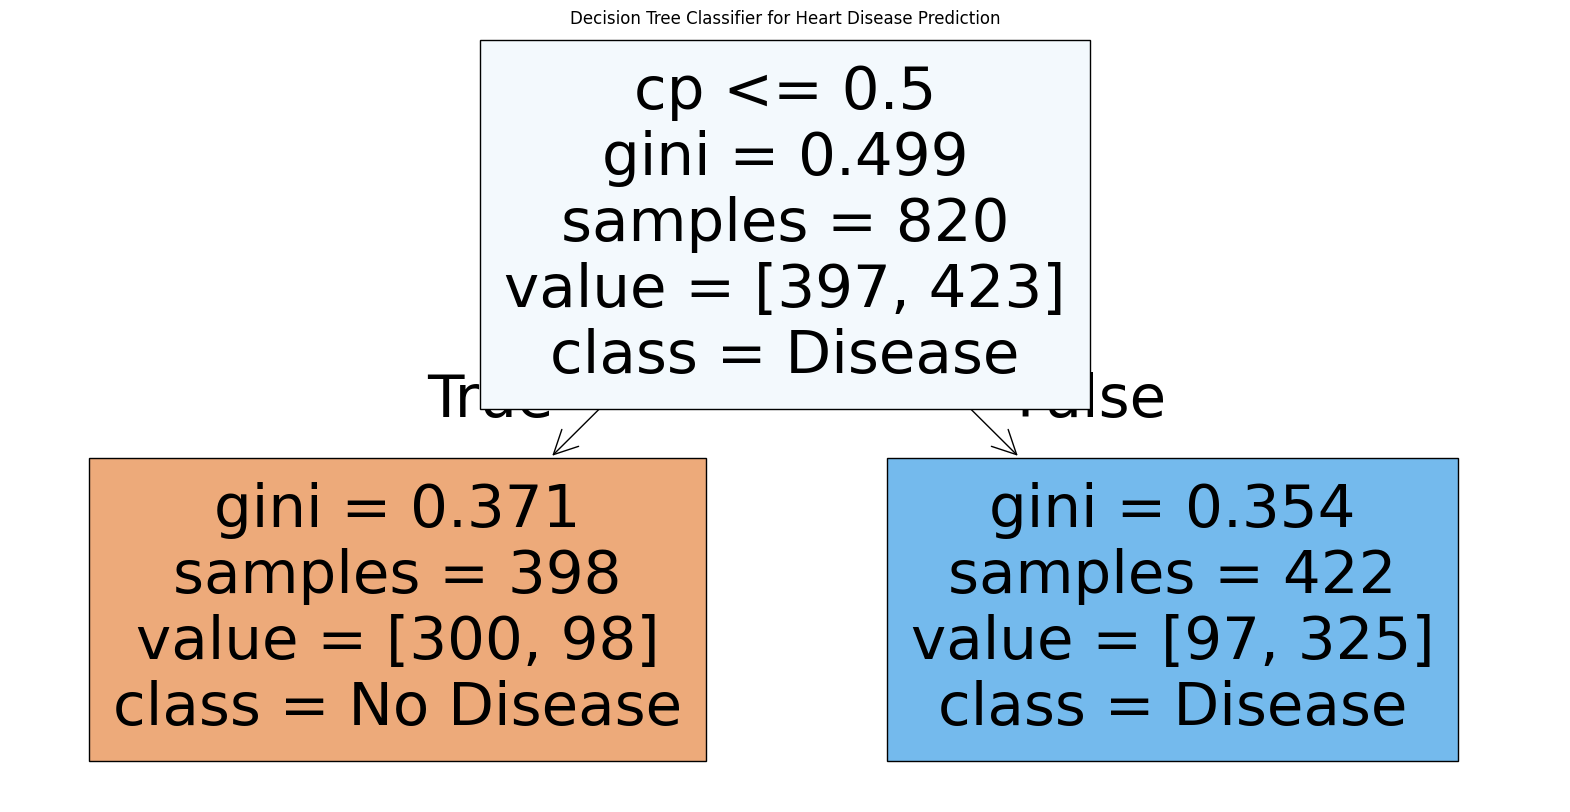

The depth of the tree is: 1
The number of leaves in the decision tree classifier: 2
Train Accuracy: 0.76
Test Accuracy: 0.75


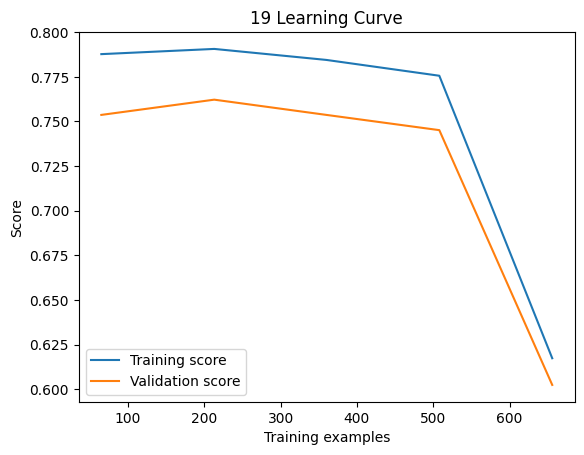

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

path = clf_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees with different pruning levels
trees = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

for i in range(len(trees)):
    plt.figure(figsize=(20, 10))
    plot_tree(trees[i], feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
    plt.title("Decision Tree Classifier for Heart Disease Prediction")
    plt.show()
    print(f"The depth of the tree is: {trees[i].get_depth()}")
    print(f"The number of leaves in the decision tree classifier: {trees[i].tree_.n_leaves}")
    
    # Evaluate
    train_acc = accuracy_score(y_train, trees[i].predict(X_train))
    test_acc = accuracy_score(y_test, trees[i].predict(X_test))
    
    print(f"Train Accuracy: {train_acc:.2f}")
    print(f"Test Accuracy: {test_acc:.2f}")
    train_sizes, train_scores, test_scores = learning_curve(trees[i], X_train, y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.title(f"{i+1} Learning Curve")
    plt.show()

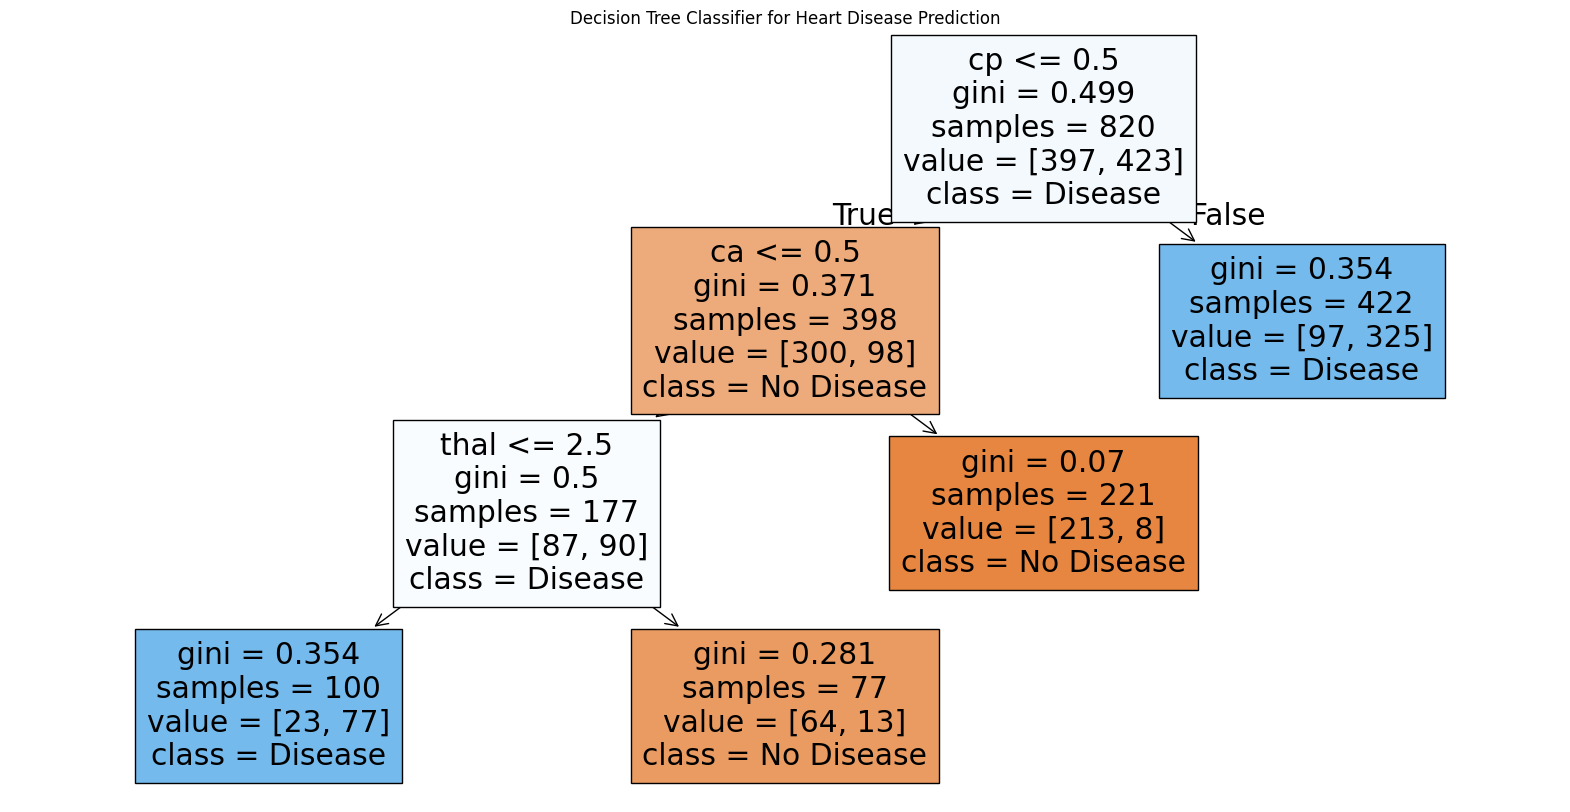

The depth of the tree is: 3
The number of leaves in the decision tree classifier: 4
Train Accuracy: 0.83
Test Accuracy: 0.78


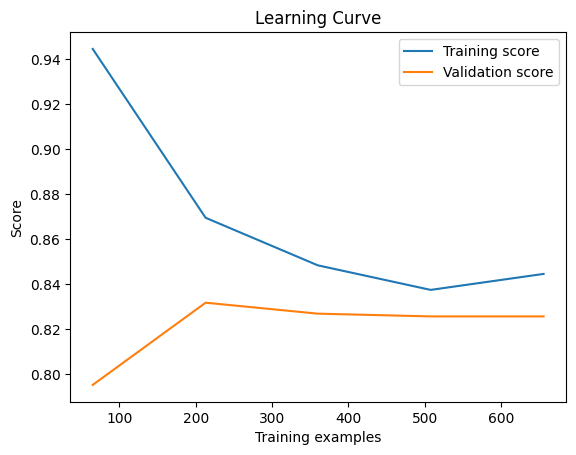

In [14]:
final_tree = trees[15]
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Classifier for Heart Disease Prediction")
plt.show()
print(f"The depth of the tree is: {final_tree.get_depth()}")
print(f"The number of leaves in the decision tree classifier: {final_tree.tree_.n_leaves}")

# Evaluate
train_acc = accuracy_score(y_train,final_tree.predict(X_train))
test_acc = accuracy_score(y_test, final_tree.predict(X_test))

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
train_sizes, train_scores, test_scores = learning_curve(final_tree, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

#### As, the decision tree at index 15 rises the test accuracy 4%, without effecting training accuracy, this model seems to the most desired one.
#### Though, the model only has accuracy of 78%, by training with more datasets, the performance gradually improves.

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predict and Evaluate
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.9854


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.9817073170731707


In [17]:
rf = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\arunj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has fe

Best Tree Index: 278, Accuracy: 1.0000


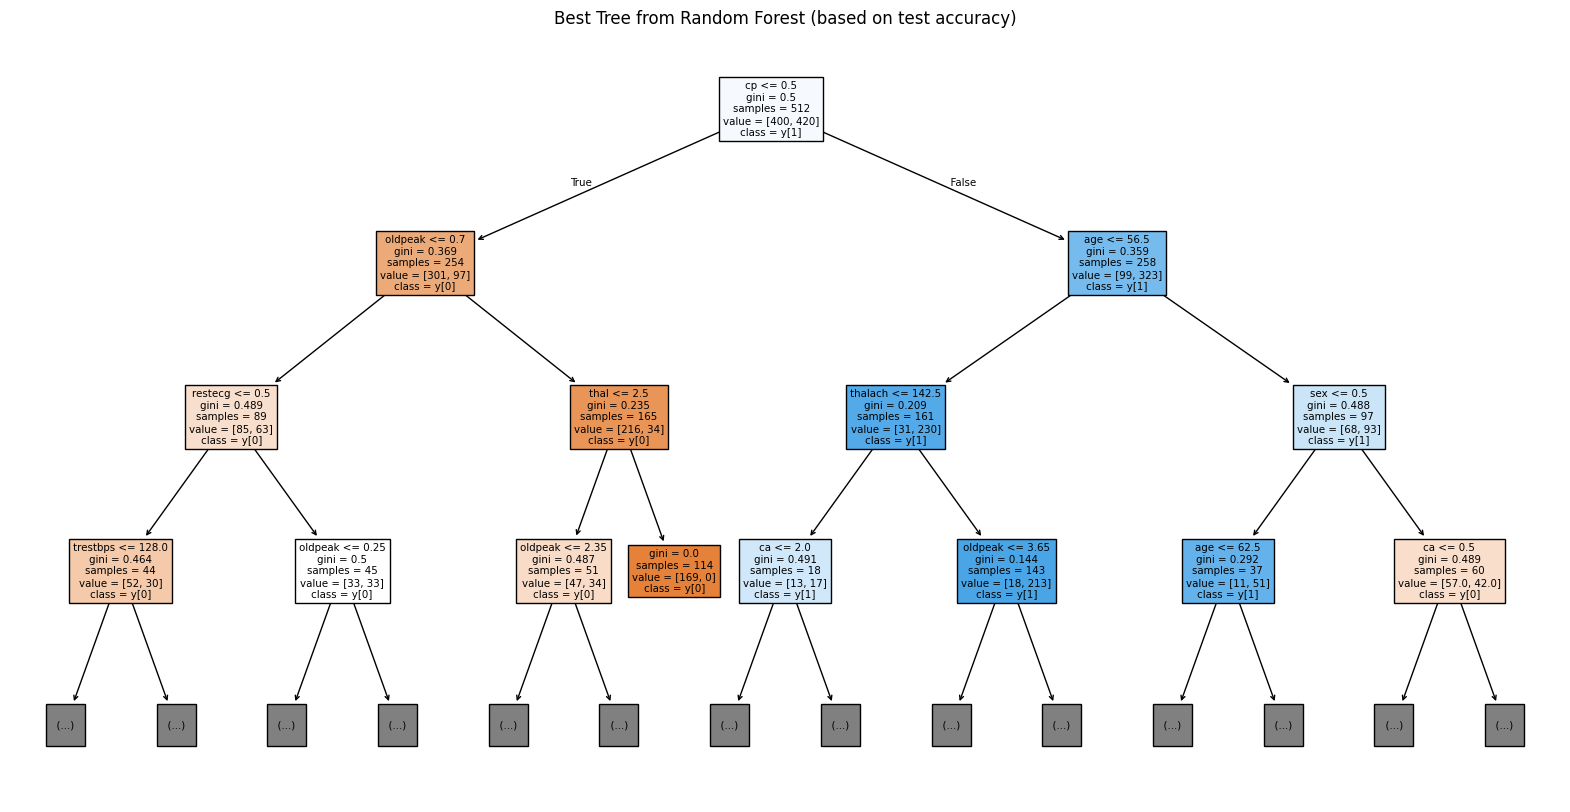

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Evaluate each tree in the forest on validation or test data
accuracies = [accuracy_score(y_test, tree.predict(X_test)) for tree in rf.estimators_]

best_tree_index = accuracies.index(max(accuracies))
best_tree = rf.estimators_[best_tree_index]

print(f"Best Tree Index: {best_tree_index}, Accuracy: {accuracies[best_tree_index]:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=True, filled=True, max_depth=3)
plt.title("Best Tree from Random Forest (based on test accuracy)")
plt.show()

In [19]:
from sklearn.tree import export_text

tree_text = export_text(rf.estimators_[278], feature_names=list(X_train.columns))
print(tree_text)

|--- cp <= 0.50
|   |--- oldpeak <= 0.70
|   |   |--- restecg <= 0.50
|   |   |   |--- trestbps <= 128.00
|   |   |   |   |--- thalach <= 181.00
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- age <= 65.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- age >  65.50
|   |   |   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- exang >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- thalach >  181.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- trestbps >  128.00
|   |   |   |   |--- oldpeak <= 0.50
|   |   |   |   |   |--- ca <= 1.00
|   |   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |   |--- trestbps <= 134.00
|   |   |   |   |   |   |   |   |--- thalach <= 156.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- 

In [20]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
2         cp    0.142495
11        ca    0.129975
7    thalach    0.117294
9    oldpeak    0.116945
12      thal    0.114403
0        age    0.079722
4       chol    0.077644
3   trestbps    0.069045
8      exang    0.051613
10     slope    0.044443
1        sex    0.029856
6    restecg    0.017949
5        fbs    0.008616


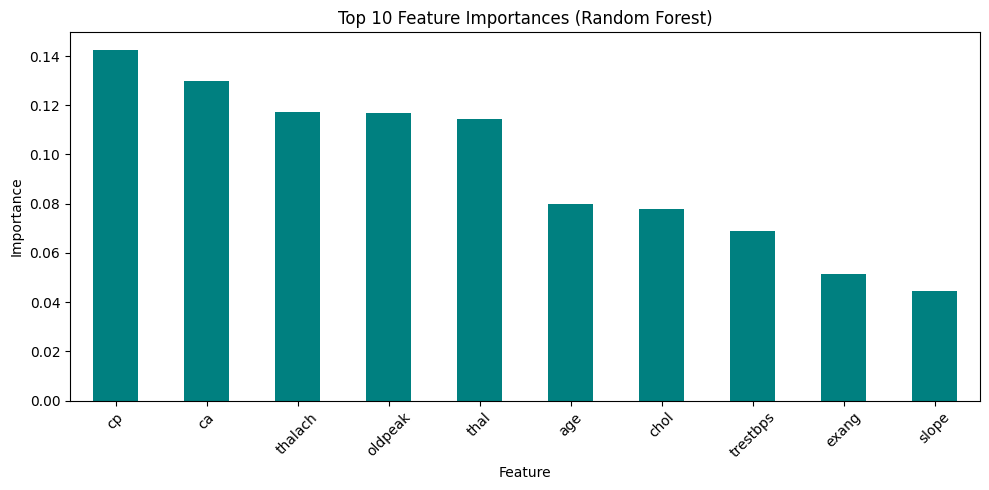

In [21]:
import matplotlib.pyplot as plt

# Plot top N features
top_n = 10
importance_df.head(top_n).plot(
    x='Feature', y='Importance', kind='bar', legend=False, figsize=(10, 5), color='teal'
)
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

CV Accuracy: 0.84 (+/- 0.03)
